In [1]:
%%capture nop
import os 
IS_KAGGLE = not not os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')
if IS_KAGGLE:
    !git clone https://github.com/Janluke0/PoS-Tagging/
    os.chdir('PoS-Tagging')
    !pip install positional-encodings
else:
    os.chdir('..')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
GPU = 1 if torch.cuda.is_available() else 0

In [3]:
from dataset.tokenizer import get_tokenizer
from dataset.twtita import mk_dataloaders, TWITADS

import model.recurrent.gru as gru
from model import TokenOfSeqClassifier

TAGS = TWITADS._TAGS

In [4]:
available = ["BPE", "WordPiece","BERT_pretrained", "ELECTRA_pretrained", "ROBERTA_pretrained", "DBERT_pretrained"]

In [5]:
def mk4tknzr(name):
    tknzr = get_tokenizer('resampled_train',name)
    ntags, dl_train = mk_dataloaders(tknzr,['resampled_train'],batch_size=256)
    vocab = tknzr.vocab_size if hasattr(tknzr,'vocab_size')  else tknzr.get_vocab_size()
    _, dl_val = mk_dataloaders(tknzr,['resampled_validation'], shuffle=False,batch_size=256)
    model =  gru.TokenOfSeqClassifier(d_input=vocab, d_model=128, d_output=ntags, dropout=0.1,add_embedding_projection=True)
    pl_model = TokenOfSeqClassifier(model, 
                                    nclass=len(TAGS),
                                    label_idx_to_ignore=[ TAGS['[EPAD]'],TAGS['[BOS]'], TAGS['[EOS]'], TAGS['[PAD]']])
    return pl_model, (dl_train,dl_val)

def plot_curves(model):
    acc, loss = model.val_metrics['accuracy'],model.val_metrics['loss']
    print(acc[-1],max(acc))
    print(loss[-1],min(loss))
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.plot(acc)
    plt.subplot(122)
    plt.plot(loss)
    
early_stopping = lambda: pl.callbacks.EarlyStopping(monitor='val_acc',min_delta=1e-6,mode='max',patience=400)
checkpoints = lambda: pl.callbacks.ModelCheckpoint(monitor='val_acc',mode='max')

In [6]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('BPE')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9200355410575867 0.9249222278594971
0.1391618698835373 0.07001344859600067


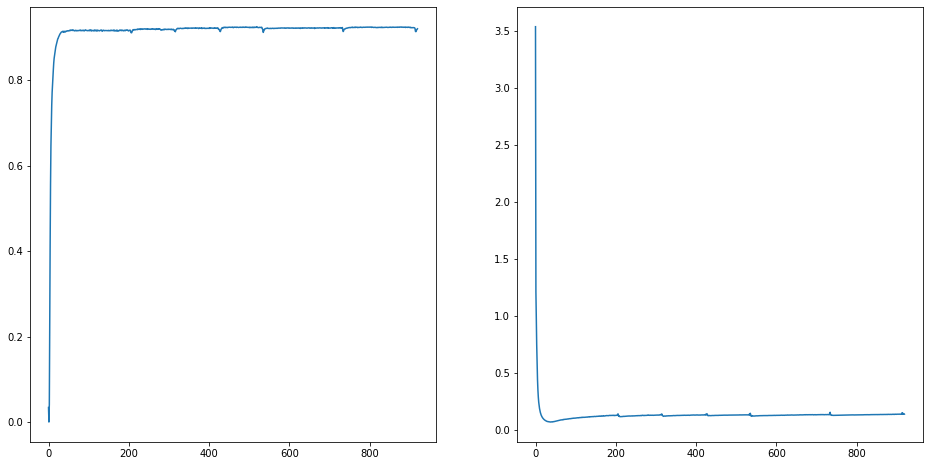

In [7]:
plot_curves(model)
del model,dl_train,dl_val

In [8]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('WordPiece')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9173480272293091 0.9187700152397156
0.21487802267074585 0.08642469346523285


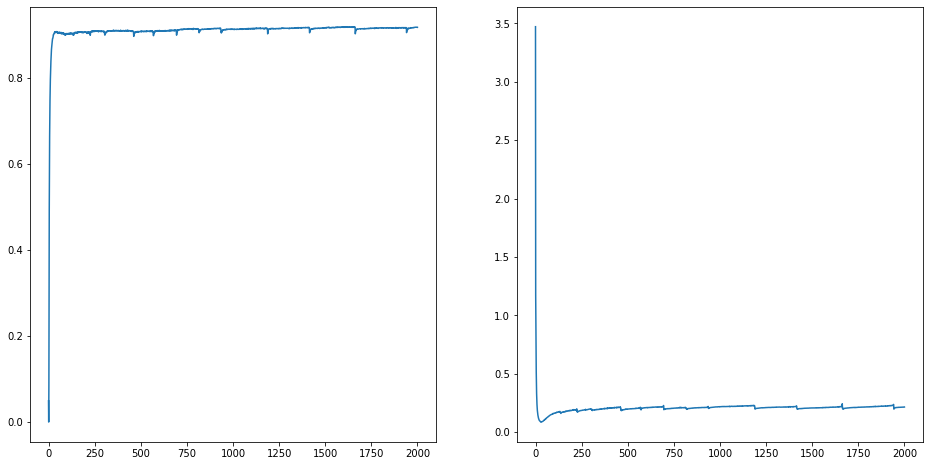

In [9]:
plot_curves(model)
del model,dl_train,dl_val

In [10]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('BERT_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9002844095230103 0.9015285968780518
0.37009671330451965 0.1481965333223343


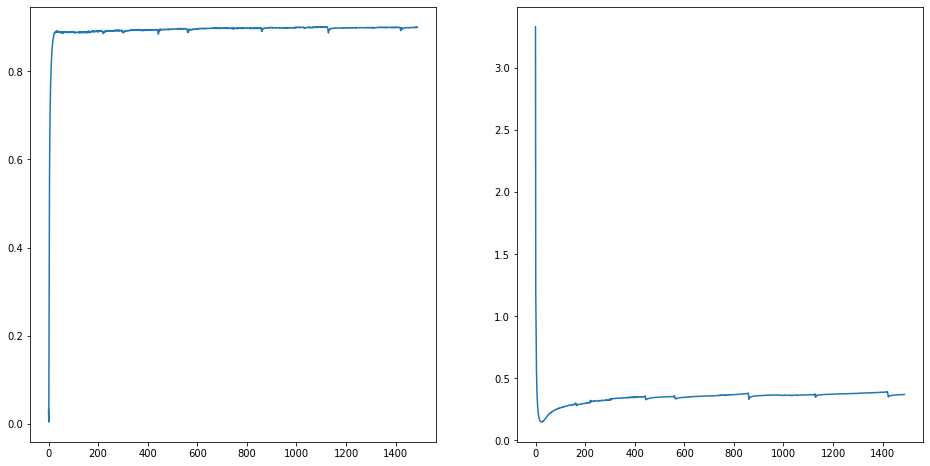

In [11]:
plot_curves(model)
del model,dl_train,dl_val

In [12]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('DBERT_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9081296920776367 0.9107952117919922
0.3161088526248932 0.14224271476268768


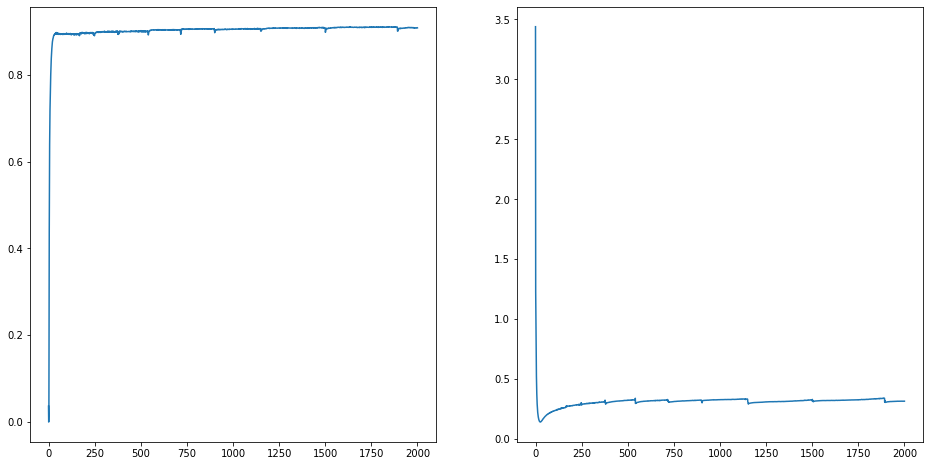

In [13]:
plot_curves(model)
del model,dl_train,dl_val

In [14]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('ELECTRA_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.8991559147834778 0.9053753614425659
0.3207915425300598 0.14514049887657166


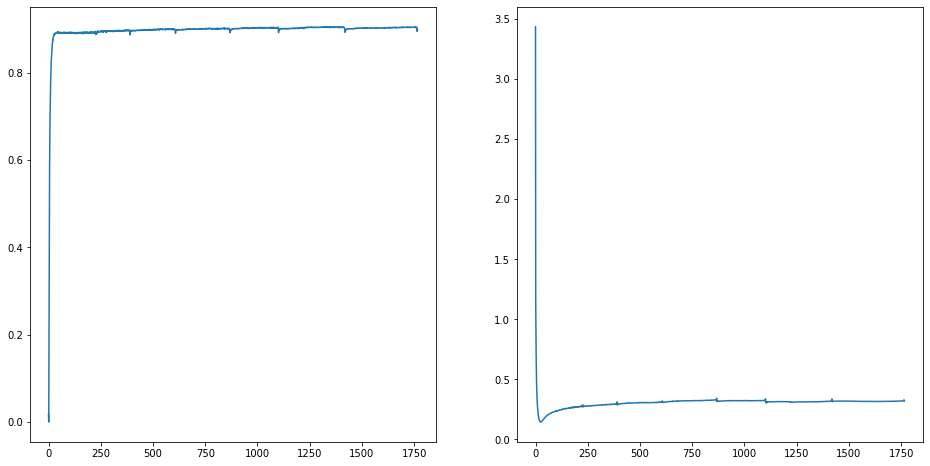

In [15]:
plot_curves(model)
del model,dl_train,dl_val

In [16]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('ROBERTA_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9164815545082092 0.9166592359542847
0.3165895640850067 0.1430748701095581


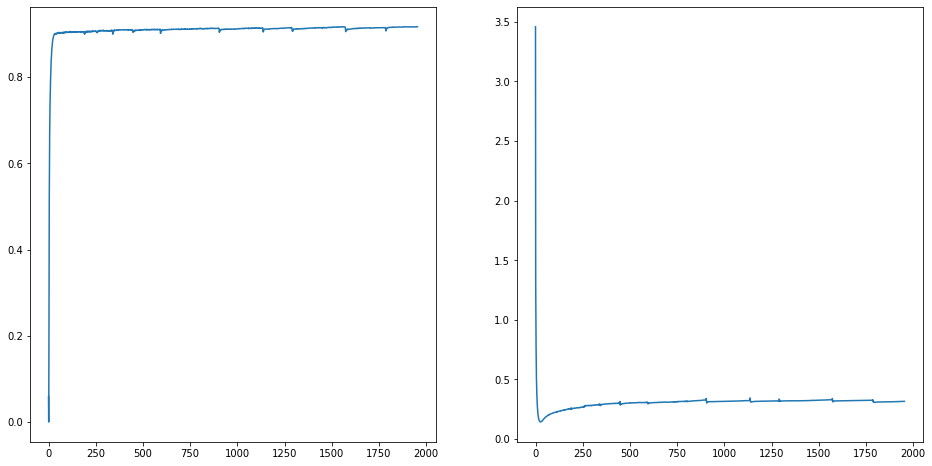

In [17]:
plot_curves(model)
del model,dl_train,dl_val